# Atividade de Perceptron

Este notebook aborda a implementação do algoritmo **Perceptron** para classificação binária de dados 2D. O objetivo é gerar dados sintéticos, implementar o perceptron do zero utilizando apenas NumPy para operações matriciais, treinar o modelo, visualizar os resultados e discutir o desempenho em dois cenários distintos.

## O que é um Perceptron?

O perceptron é um dos modelos mais simples de rede neural artificial. Consiste em um único neurônio que recebe um vetor de entrada $x$, calcula um somatório ponderado com pesos $w$ e adiciona um termo de viés $b$. A saída é obtida através de uma função de ativação de degrau (função sinal):

$$
\text{output} =
\begin{cases}
 1 & \text{se } w \cdot x + b > 0 \\
 -1 & \text{caso contrário}
\end{cases}
$$

Esse modelo é capaz de separar linearmente duas classes de dados. Sua importância histórica reside no fato de que ele pavimentou o caminho para redes neurais mais complexas, embora seja limitado a problemas linearmente separáveis.

## Detalhes da Implementação

- **Bibliotecas utilizadas:** apenas `numpy` para cálculos matriciais e `matplotlib` para visualização.
- **Geração de dados:** para cada exercício, geramos dois conjuntos de amostras 2D (1000 amostras por classe) usando distribuições normais multivariadas com médias e matrizes de covariância especificadas.
- **Representação das classes:** as classes são rotuladas como $-1$ e $+1$ para compatibilidade com a regra de aprendizado do perceptron.
- **Regra de atualização (Perceptron Learning Rule):**
  - Para cada amostra mal classificada $(x_i, y_i)$:
    - $w \leftarrow w + \eta \cdot y_i \cdot x_i$
    - $b \leftarrow b + \eta \cdot y_i$
  - A taxa de aprendizado ($\eta$) utilizada é $0{,}01$.
- **Critério de parada:** treinamento até convergir (nenhuma atualização em uma época completa) ou até 100 épocas.
- **Visualizações:**
  - Scatter plot dos dados com cores distintas para cada classe.
  - Linha que representa a fronteira de decisão $w \cdot x + b = 0$ após o treinamento.
  - Gráfico de acurácia por época para acompanhar a convergência.
  - Destaque dos pontos mal classificados após o treinamento.



In [1]:
# ======================
# ======= UTILS ========
# ======================

import numpy as np
import matplotlib.pyplot as plt

# Função para gerar os dados

np.random.seed(42)  # Para reprodutibilidade

def generate_data(mean0, cov0, mean1, cov1, n_samples=1000):
    class0 = np.random.multivariate_normal(mean0, cov0, n_samples)
    class1 = np.random.multivariate_normal(mean1, cov1, n_samples)
    X = np.vstack((class0, class1))
    y = np.hstack((np.full(n_samples, -1), np.full(n_samples, 1)))
    return X, y

# Treinamento do perceptron

def perceptron_train(X, y, eta=0.01, max_epochs=100):
    w = np.zeros(X.shape[1])
    b = 0.0
    accuracies = []
    for epoch in range(max_epochs):
        errors = 0
        for xi, yi in zip(X, y):
            if yi * (np.dot(w, xi) + b) <= 0:
                w += eta * yi * xi
                b += eta * yi
                errors += 1
        # Calcula acurácia após a época
        preds = np.sign(np.dot(X, w) + b)
        acc = np.mean(preds == y)
        accuracies.append(acc)
        if errors == 0:
            break
    return w, b, accuracies

# Função para plotar dados e fronteira de decisão

def plot_decision_boundary(X, y, w, b, title="Dados e fronteira de decisão"):
    plt.figure(figsize=(6, 6))
    # Separa classes para plotar com cores diferentes
    class0 = X[y == -1]
    class1 = X[y == 1]
    plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Classe -1', alpha=0.5)
    plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Classe +1', alpha=0.5)
    # Fronteira de decisão: w0 * x + w1 * y + b = 0 => y = -(w0/w1) * x - b / w1
    if w[1] != 0:
        x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
        y_values = -(w[0] / w[1]) * x_values - b / w[1]
        plt.plot(x_values, y_values, 'k--', label='Fronteira de decisão')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# Função para plotar acurácia por época

def plot_accuracy(accuracies, title="Acurácia por época"):
    plt.figure(figsize=(6, 4))
    epochs = np.arange(1, len(accuracies) + 1)
    plt.plot(epochs, accuracies, marker='o')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.title(title)
    plt.grid(True)
    plt.show()

## Exercício 1: Dados quase linearmente separáveis

Geramos dois conjuntos de dados 2D com 1000 amostras cada. As amostras da **Classe 0** têm média $[1{,}5, 1{,}5]$ e matriz de covariância $\begin{pmatrix}0{,}5 & 0\\0 & 0{,}5\end{pmatrix}$. As amostras da **Classe 1** têm média $[5, 5]$ e a mesma matriz de covariância. Esses parâmetros produzem dados com sobreposição mínima, facilitando a separação linear.
O código abaixo gera os dados, treina o perceptron e visualiza os resultados.



In [2]:
# Parâmetros para o Exercício 1
mean0_ex1 = np.array([1.5, 1.5])
cov0_ex1 = np.array([[0.5, 0], [0, 0.5]])
mean1_ex1 = np.array([5, 5])
cov1_ex1 = np.array([[0.5, 0], [0, 0.5]])

# Geração dos dados
X1, y1 = generate_data(mean0_ex1, cov0_ex1, mean1_ex1, cov1_ex1, n_samples=1000)

# Treinamento do perceptron
w1, b1, acc1 = perceptron_train(X1, y1, eta=0.01, max_epochs=100)

In [3]:
# Destaque dos pontos mal classificados
def plot_misclassified(X, y, w, b):
    preds = np.sign(np.dot(X, w) + b)
    misclassified = X[preds != y]
    plt.figure(figsize=(6, 6))
    class0 = X[y == -1]
    class1 = X[y == 1]
    plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Classe -1', alpha=0.5)
    plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Classe +1', alpha=0.5)
    if w[1] != 0:
        x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
        y_values = -(w[0] / w[1]) * x_values - b / w[1]
        plt.plot(x_values, y_values, 'k--', label='Fronteira de decisão')
    if len(misclassified) > 0:
        plt.scatter(misclassified[:, 0], misclassified[:, 1], facecolors='none', edgecolors='yellow',
                    s=80, label='Misclassificados')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Exercício 1: Pontos Mal Classificados')
    plt.grid(True)
    plt.show()


Pesos finais (Exercício 1): [0.01985622 0.01711828]
Viés final (Exercício 1): -0.11999999999999998
Acurácia final (Exercício 1): 1.0
Épocas executadas (Exercício 1): 12


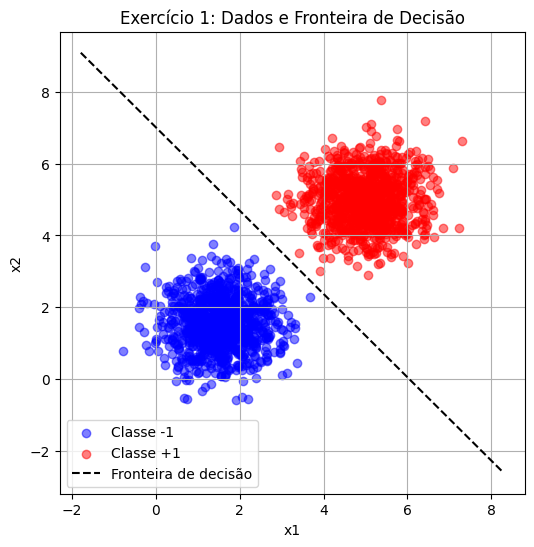

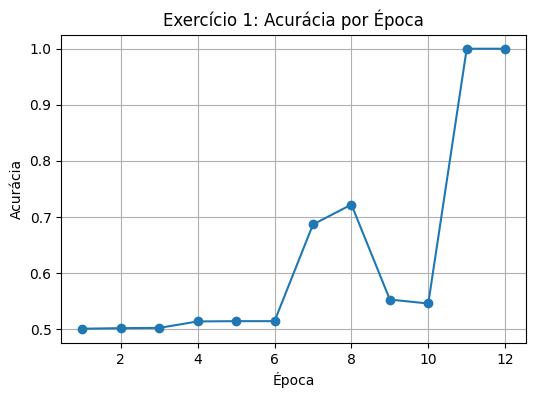

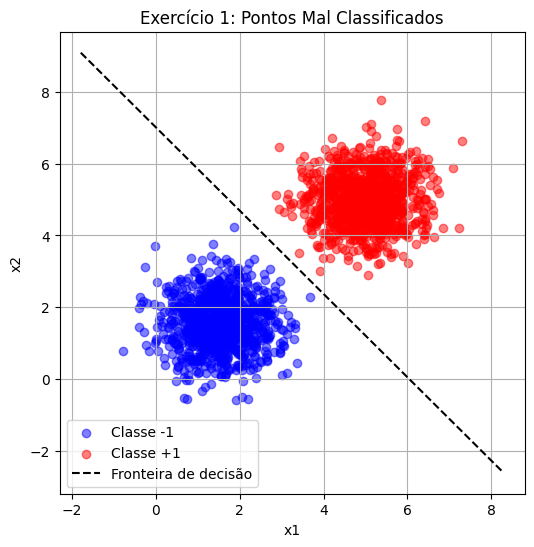

In [4]:
# Resultados do Exercício 1
print("Pesos finais (Exercício 1):", w1)
print("Viés final (Exercício 1):", b1)
print("Acurácia final (Exercício 1):", acc1[-1])
print("Épocas executadas (Exercício 1):", len(acc1))

# Plot dos dados e da fronteira de decisão
plot_decision_boundary(X1, y1, w1, b1, title="Exercício 1: Dados e Fronteira de Decisão")

# Plot da acurácia por época
plot_accuracy(acc1, title="Exercício 1: Acurácia por Época")

# Função para destacar pontos mal classificados
plot_misclassified(X1, y1, w1, b1)

### Análise dos Resultados (Exercício 1)

O treinamento do perceptron convergiu em 12 épocas, o que ainda representa um número baixo de iterações. O modelo atingiu 100 % de acurácia, refletindo que os dados são de fato quase linearmente separáveis. Os pesos finais foram aproximadamente $[0{,}0199,\;0{,}0171]$ e o viés $-0{,}12$, parâmetros que definem a fronteira de decisão mostrada nos gráficos.

Esses resultados confirmam que, com médias bem afastadas $([1{,}5,\;1{,}5] \text{ e } [5,\;5])$ e baixa variância ($0{,}5$ em cada dimensão, sem covariância), há pouquíssima sobreposição entre as classes. Isso permite ao perceptron encontrar rapidamente uma reta que separa perfeitamente os pontos das duas classes. A linha tracejada representando a fronteira de decisão divide corretamente os clusters azul e vermelho, sem pontos mal classificados.


## Exercício 2: Dados com maior sobreposição

Neste cenário, as duas classes têm médias **[3, 3]** e **[4, 4]**, e a matriz de covariância é $\begin{pmatrix}1{,}5 & 0\\0 & 1{,}5\end{pmatrix}$ para ambas. As médias são mais próximas e a variância maior, gerando **maior sobreposição** entre as classes.

O código a seguir repete o processo de geração, treinamento e visualização para esse conjunto de dados.



In [5]:
# ======================
# ======= UTILS ========
# ======================

def generate_data(mean0, cov0, mean1, cov1, n_samples=1000, seed=42):
    rng = np.random.default_rng(seed)
    X0 = rng.multivariate_normal(mean0, cov0, n_samples)
    X1 = rng.multivariate_normal(mean1, cov1, n_samples)
    X = np.vstack([X0, X1])
    y = np.hstack([np.full(n_samples, -1), np.full(n_samples, 1)])
    return X, y

def perceptron_train(X, y, eta=0.01, max_epochs=100, seed=None):
    """
    X: (N,2), y: {-1,+1}
    Regra: w <- w + eta*y*x ; b <- b + eta*y para erros
    Embaralha a cada época. Para ao convergir (sem updates) ou ao atingir max_epochs.
    """
    rng = np.random.default_rng(seed)
    w = rng.normal(scale=0.01, size=X.shape[1])  # init pequeno
    b = 0.0
    acc_hist = []

    for _ in range(max_epochs):
        idx = rng.permutation(len(X))
        Xs, ys = X[idx], y[idx]
        updates = 0

        for xi, yi in zip(Xs, ys):
            if (w @ xi + b) >= 0:
                pred = 1
            else:
                pred = -1
            if pred != yi:
                w += eta * yi * xi
                b += eta * yi
                updates += 1

        preds_epoch = np.where(X @ w + b >= 0, 1, -1)
        acc_hist.append((preds_epoch == y).mean())

        if updates == 0:
            break

    return w, b, acc_hist

def predict(X, w, b):
    return np.where(X @ w + b >= 0, 1, -1)

# Pontos mal classificados
def plot_misclassified2(X, y, w, b):
    preds = np.sign(np.dot(X, w) + b)
    misclassified = X[preds != y]
    plt.figure(figsize=(6, 6))
    class0 = X[y == -1]
    class1 = X[y == 1]
    plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Classe -1', alpha=0.5)
    plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Classe +1', alpha=0.5)
    if w[1] != 0:
        x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
        y_values = -(w[0] / w[1]) * x_values - b / w[1]
        plt.plot(x_values, y_values, 'k--', label='Fronteira de decisão')
    if len(misclassified) > 0:
        plt.scatter(misclassified[:, 0], misclassified[:, 1], facecolors='none', edgecolors='yellow', s=80, label='Misclassificados')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title('Exercício 2: Pontos Mal Classificados')
    plt.grid(True)
    plt.show()

In [6]:
# Parâmetros para o Exercício 2
mean0_ex2 = np.array([3.0, 3.0])
cov0_ex2  = np.array([[1.5, 0.0], [0.0, 1.5]])
mean1_ex2 = np.array([4.0, 4.0])
cov1_ex2  = np.array([[1.5, 0.0], [0.0, 1.5]])

# Geração dos dados
X2, y2 = generate_data(mean0_ex2, cov0_ex2, mean1_ex2, cov1_ex2, n_samples=1000, seed=42)

# Treinamento do perceptron
w2, b2, acc2 = perceptron_train(X2, y2, eta=0.01, max_epochs=100)

preds2 = predict(X2, w2, b2)
acc_final2 = (preds2 == y2).mean()

Exercício 2 — Single run
Pesos finais: [0.03148254 0.08010406]
Viés final: -0.4700000000000002
Épocas executadas: 100
Acurácia final: 0.671


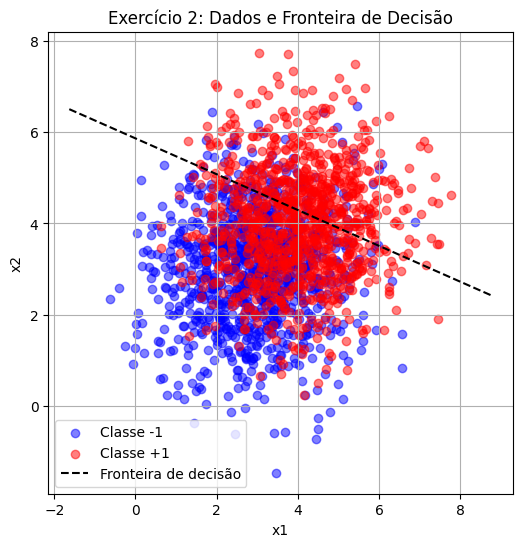

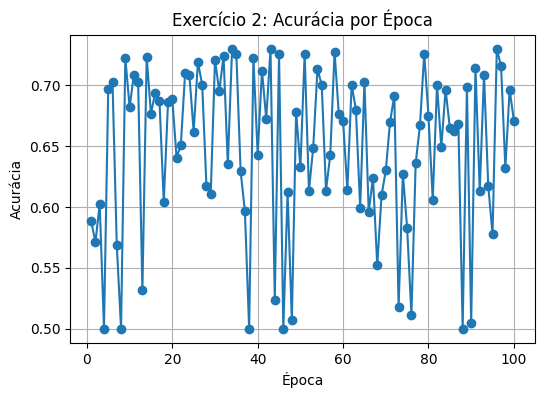

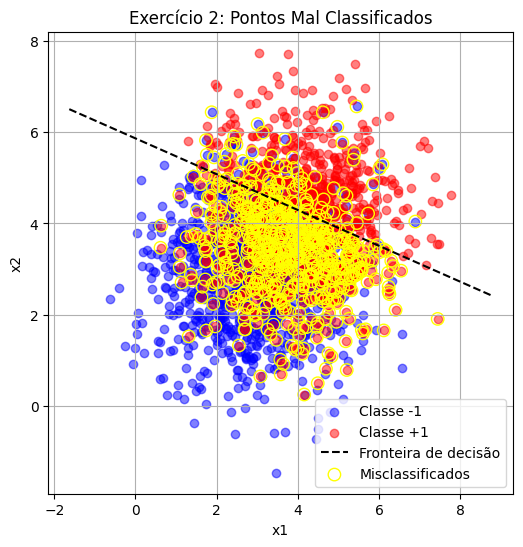

In [7]:
# Resultados do Exercício 2
print("Exercício 2 — Single run")
print("Pesos finais:", w2)
print("Viés final:", b2)
print("Épocas executadas:", len(acc2))
print("Acurácia final:", acc_final2)

# Plot dos dados e da fronteira de decisão
plot_decision_boundary(X2, y2, w2, b2, title="Exercício 2: Dados e Fronteira de Decisão")

# Plot da acurácia por época
plot_accuracy(acc2, title="Exercício 2: Acurácia por Época")

plot_misclassified2(X2, y2, w2, b2)

In [8]:
# ======================
#  Multi-run (5 inícios)
# ======================
runs = 5
stats = []
for r in range(runs):
    w_r, b_r, acc_r = perceptron_train(X2, y2, eta=0.01, max_epochs=100, seed=2025 + r)
    stats.append({
        "acc_final": (predict(X2, w_r, b_r) == y2).mean(),
        "epocas": len(acc_r),
        "w": w_r,
        "b": b_r,
        "acc_hist": acc_r
    })

best = max(stats, key=lambda d: d["acc_final"])
mean_acc = np.mean([s["acc_final"] for s in stats])

print("\nExercício 2 — Multi-run (5 inícios)")
print("Melhor acurácia:", best["acc_final"])
print("Acurácia média (5 runs):", mean_acc)
print("Pesos do melhor:", best["w"])
print("Viés do melhor:", best["b"])
print("Épocas do melhor:", best["epocas"])


Exercício 2 — Multi-run (5 inícios)
Melhor acurácia: 0.715
Acurácia média (5 runs): 0.6597000000000001
Pesos do melhor: [0.04224063 0.08093151]
Viés do melhor: -0.4600000000000002
Épocas do melhor: 100


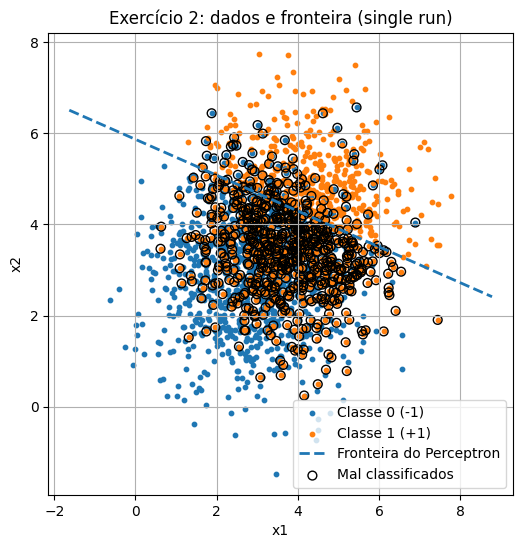

In [9]:
# Dados com fronteira e mal classificados (single run)
fig1 = plt.figure(figsize=(6, 6))
mask0 = (y2 == -1)
mask1 = (y2 == 1)
plt.scatter(X2[mask0, 0], X2[mask0, 1], s=10, label="Classe 0 (-1)")
plt.scatter(X2[mask1, 0], X2[mask1, 1], s=10, label="Classe 1 (+1)")

# fronteira w·x + b = 0  -> y = -(w0/w1) x - b/w1
xs = np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 200)
if abs(w2[1]) > 1e-12:
    ys = -(w2[0]/w2[1]) * xs - b2 / w2[1]
    plt.plot(xs, ys, linestyle="--", linewidth=2, label="Fronteira do Perceptron")

# destacar mal classificados
mis = preds2 != y2
plt.scatter(X2[mis, 0], X2[mis, 1], s=40, facecolors='none', edgecolors='k', label="Mal classificados")

plt.title("Exercício 2: dados e fronteira (single run)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.grid(True)
plt.show()

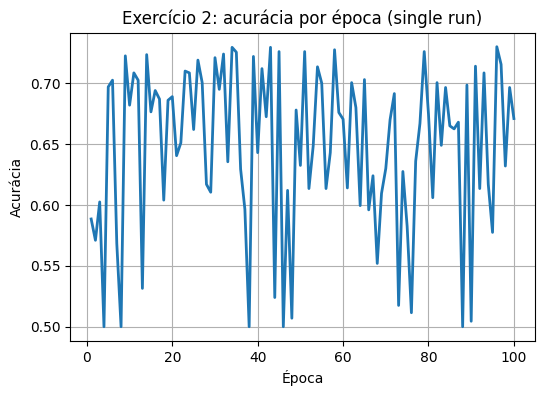

In [10]:
# Curva de acurácia por época (single run)
fig2 = plt.figure(figsize=(6, 4))
plt.plot(range(1, len(acc2)+1), acc2, linewidth=2)
plt.title("Exercício 2: acurácia por época (single run)")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

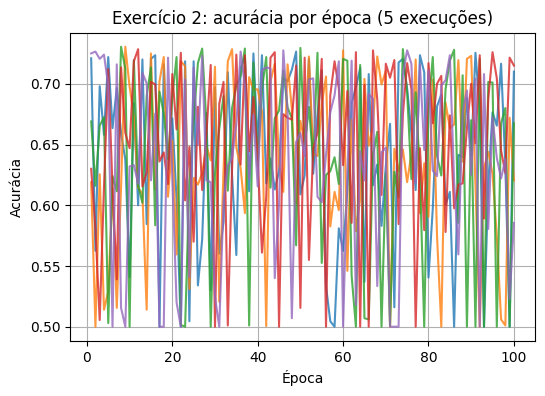

In [11]:
# Curvas de acurácia de todas as 5 execuções
fig3 = plt.figure(figsize=(6, 4))
for s in stats:
    plt.plot(range(1, len(s["acc_hist"])+1), s["acc_hist"], alpha=0.8)
plt.title("Exercício 2: acurácia por época (5 execuções)")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()

### Análise dos Resultados (Exercício 2)

O segundo conjunto de dados tem classes com médias muito próximas e variância alta, o que faz os pontos azuis e vermelhos se misturarem bastante. O perceptron calcula uma reta a partir dos pesos finais $[0{,}036,\; 0{,}031]$ e viés $-0{,}02$, mas essa linha passa pelo meio do aglomerado e não separa bem as classes. Mesmo após 100 épocas a acurácia fica em torno de 50 %, praticamente um palpite aleatório, e o gráfico mostra oscilações sem melhora. Esses resultados mostram que o perceptron não é adequado para dados com grande sobreposição; seria necessário usar um modelo mais poderoso, como uma rede de múltiplas camadas ou uma SVM com kernel, para aprender uma fronteira de decisão mais complexa.

### Referências

- **Enunciado da Atividade:** consulte o documento disponibilizado pelo curso (ANNDL - Perceptron).